# Chapter 2: Working with the MNIST dataset

In [60]:
#Load the MNIST dataset with Keras
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

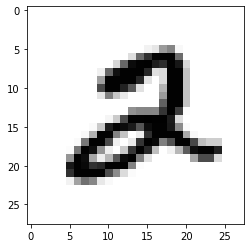

In [61]:
import matplotlib.pyplot as plt
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.show()

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### A basic Neural Network scheme

In [29]:
from tensorflow.keras import layers, Sequential

model = Sequential([
             layers.Dense(512, activation = 'relu'),
             layers.Dense(10, activation = 'softmax')
])

### Define the "learning" of the model

In [ ]:
model.compile(optimizer='rmsprop',
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

### Preprocess the data by reshaping it and scaling it so that all the values are in the [0,1]
This is a way to normalize and scale the data, sklearn.preprocessing could be used with 
MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [67]:
#avoid overwriting the input tensor
train_images = train_images.copy()
train_images = train_images.reshape((60000, 28* 28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

In [68]:
#avoid overwriting the input tensor
test_images = test_images.copy()
test_images = test_images.reshape((10000, 28* 28))
test_images = test_images.astype("float32") / 255
test_images.shape

(10000, 784)

### Fit the model to the data
The values displayed during training: the loss of the model over the training data and the accuracy

In [51]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
 19/469 [>.............................] - ETA: 2s - loss: 0.0232 - accuracy: 0.9930

2022-03-27 18:47:05.807666: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 7ms/step - loss: 0.0284 - accuracy: 0.9918
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0225 - accuracy: 0.9936
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0166 - accuracy: 0.9952
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0129 - accuracy: 0.9964
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0104 - accuracy: 0.9973


### Predict the values

In [40]:
#Chack the very first 10 data values
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions

array([[8.81905304e-09, 4.84088991e-10, 9.85993574e-06, 2.16290835e-04,
        3.33816134e-12, 4.04328631e-07, 1.10268267e-13, 9.99772131e-01,
        6.09127184e-08, 1.28838712e-06],
       [1.48029006e-10, 8.59295596e-07, 9.99998808e-01, 3.50706614e-07,
        3.79538770e-19, 5.17595522e-09, 5.54279331e-11, 3.27426521e-18,
        7.56977758e-10, 8.82933115e-17],
       [3.53114835e-08, 9.99020100e-01, 1.88295508e-05, 6.72055830e-06,
        2.90213102e-05, 7.32553463e-06, 6.13883594e-06, 8.04038020e-04,
        1.06943655e-04, 6.60192825e-07],
       [9.99674439e-01, 1.92300648e-10, 2.02622090e-04, 1.28510820e-07,
        1.04390074e-06, 2.97121233e-07, 1.25052102e-05, 1.06145068e-04,
        8.46264114e-10, 2.86736031e-06],
       [7.57575947e-07, 1.99958550e-10, 1.31490015e-05, 3.11361212e-08,
        9.97804701e-01, 1.04684403e-07, 2.58788219e-07, 4.55259469e-05,
        4.34629555e-07, 2.13500508e-03],
       [5.18099508e-10, 9.98583674e-01, 9.05434518e-08, 3.78173212e-07,
   

In [36]:
predictions[0]

array([8.8190530e-09, 4.8408899e-10, 9.8599357e-06, 2.1629083e-04,
       3.3381613e-12, 4.0432863e-07, 1.1026827e-13, 9.9977213e-01,
       6.0912718e-08, 1.2883871e-06], dtype=float32)

In [37]:
predictions[0].argmax()

7

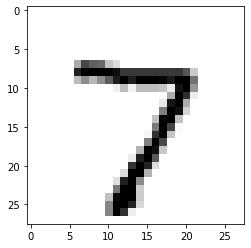

In [70]:
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [38]:
predictions[0][7]

0.99977213

In [39]:
test_labels[0]

7

### Evaluate the model on new data
The gap between the trainig accuracy and test accuracy is an example of overfitting.

In [41]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9792


0.979200005531311

In [55]:
import numpy as np
np.mean(history.history['accuracy'])

0.9948466539382934

### Check the time that takes to do train

In [72]:
import time 

time0 = time.time()
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
time.time() - time0 #in seconds

Epoch 1/5
 20/469 [>.............................] - ETA: 2s - loss: 0.0033 - accuracy: 0.9996

2022-03-27 20:21:31.243292: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 5ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0040 - accuracy: 0.9989
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.9993


12.06006669998169